## EDA : Analyse graphique de CSV

# Import

In [1]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt

# Import CSV


In [10]:
DF1 = pd.read_csv("https://storage.googleapis.com/h3-data/price_availability.csv", sep=";", index_col=0)
DF2 = pd.read_csv("https://storage.googleapis.com/h3-data/listings_final.csv", sep=";", index_col=0)

/home/saphiros/.local/lib/python3.8/site-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [9]:
DF1.head()

,day,created,available,local_currency,local_price,min_nights
listing_id,,,,,,
9810829,2018-12-08,2018-09-27 06:14:10.000+0000,True,EUR,160,1
9810829,2018-12-08,2018-09-26 19:34:02.000+0000,True,EUR,160,1
20897010,2018-12-09,2018-09-27 10:38:57.000+0000,True,EUR,172,2
20897010,2018-12-09,2018-09-27 06:10:27.000+0000,True,EUR,172,2
20897010,2018-12-09,2018-09-26 19:30:25.000+0000,True,EUR,172,2


In [11]:
DF2.head()

,listing_id,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,28581061,La maison Clery,private_room,Paris,2e arrondissement,48.869292,2.348335,1,1,1,2.0,False,True,True,False,False,1.00,1.00
1,661961,studio PARIS PLACE EDITH PIAF 75020,entire_home,Paris,NaN,48.867284,2.403255,2,1,1,1.0,False,False,True,True,False,0.88,0.69
2,1261705,chambre privée à louer @ paris oberkampf,private_room,Paris,NaN,48.867894,2.375897,1,1,1,1.0,False,False,True,True,False,1.00,1.00
3,1318834,Appartement au coeur du Marais,entire_home,Paris,République,48.870370,2.358510,3,2,2,1.0,False,False,True,False,False,0.82,0.48
4,1677091,Lovely & Quiet flat,entire_home,Paris,Buttes-Chaumont - Belleville,48.874149,2.373700,2,1,1,1.0,False,False,True,True,False,0.95,0.90


In [12]:
SUMDF = pd.merge(DF1.groupby('listing_id').local_price.mean(), DF2, on='listing_id')

In [13]:
SUMDF.head()

,listing_id,local_price,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,56093,170.000000,Beau duplex dans le Marais,entire_home,Paris,3e arrondissement,48.867284,2.358431,4,2,1,1.0,False,False,True,True,False,0.88,1.0
1,57207,49.952756,Belle Chambre pour court,private_room,Paris,Vaugirard,48.846184,2.304455,2,1,1,1.0,False,False,True,False,False,0.87,1.0
2,114543,107.374026,Charming 1bdr 55m² - Eiffel Tower,entire_home,Paris,NaN,48.849530,2.290219,2,1,1,1.0,False,False,True,True,False,0.90,0.9
3,149534,169.000000,GREAT WARM FULL APT LE HAUT MARAIS,entire_home,Paris,NaN,48.866360,2.361844,4,2,1,1.0,False,False,True,True,False,1.00,0.4
4,164255,75.876209,Perfect place in Le Marais - Paris,entire_home,Paris,3e arrondissement,48.861398,2.364299,4,2,1,1.0,False,False,True,False,False,1.00,1.0


In [14]:
SUMDF.dtypes

listing_id                    int64
local_price                 float64
name                         object
type                         object
city                         object
neighborhood                 object
latitude                    float64
longitude                   float64
person_capacity               int64
beds                          int64
bedrooms                      int64
bathrooms                   float64
is_rebookable                  bool
is_new_listing                 bool
is_fully_refundable            bool
is_host_highly_rated           bool
is_business_travel_ready       bool
pricing_weekly_factor       float64
pricing_monthly_factor      float64
dtype: object

### Graphique Gausseen sur la répartition totale des prix

In [15]:
SUMDF.count()

listing_id                  999
local_price                 999
name                        999
type                        999
city                        999
neighborhood                934
latitude                    999
longitude                   999
person_capacity             999
beds                        999
bedrooms                    999
bathrooms                   999
is_rebookable               999
is_new_listing              999
is_fully_refundable         999
is_host_highly_rated        999
is_business_travel_ready    999
pricing_weekly_factor       999
pricing_monthly_factor      999
dtype: int64

In [16]:
SUMDF.isna()

,listing_id,local_price,name,type,city,neighborhood,latitude,longitude,person_capacity,beds,bedrooms,bathrooms,is_rebookable,is_new_listing,is_fully_refundable,is_host_highly_rated,is_business_travel_ready,pricing_weekly_factor,pricing_monthly_factor
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


(array([40., 97., 89., 78., 74., 61., 54., 62., 67., 48., 45., 31., 31.,
        36., 15., 16., 18., 13., 14.,  7.,  8.,  9.,  8.,  9.,  5.,  5.,
         4.,  5.,  7.,  2.,  0.,  0.,  2.,  4.,  1.,  4.,  1.,  1.,  3.,
         2.,  1.,  0.,  0.,  0.,  2.,  0.,  2.,  1.,  1.,  0.,  1.,  1.,
         0.,  1.,  0.,  6.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  2.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([  17.86372361,   35.49099311,   53.11826261,   70.74553211,
          88.37280161,  106.00007111,  123.62734061,  141.25461011,
         158.88187961,  176.50914911,  194.13641861,  211.7636881 ,
         229.3909576 ,  247.0182271 ,  264.6454966 ,  282.2727661 ,
         299.9000356 ,  317.5273051 ,  335.1545746 ,  352.7818441 ,
         370.4091136 ,  388.0363831 ,  405.6636526 ,  423.2909221 ,
         440.9181916 ,  45

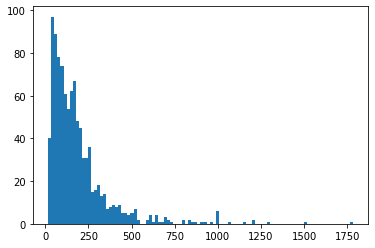

In [17]:
plt.hist(SUMDF.local_price, bins = 100)

## HeatMap sur le CSV

In [18]:
HeatDF = SUMDF[['beds', 'bedrooms', 'bathrooms', 'local_price', 'person_capacity']]

<function matplotlib.pyplot.show(close=None, block=None)>

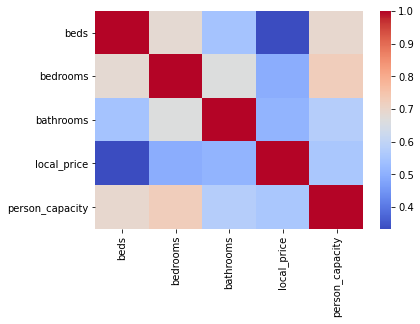

<Figure size 576x576 with 0 Axes>

In [22]:
sns.heatmap(HeatDF.corr(), cmap = "coolwarm")
plt.figure(figsize = (8,8))
plt.show

Une corrélation est remarquable entre la capacité d'un appartement en terme de population et des chambres/lits, ce qui est logique en soit.

## boite a moustache


In [23]:
fg = plt.gcf()

<Figure size 432x288 with 0 Axes>

In [33]:
fg.set_size_inches(20,5)

<AxesSubplot:xlabel='pricing_monthly_factor', ylabel='local_price'>

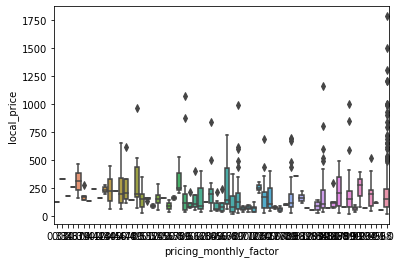

In [34]:
sns.boxplot(x = "pricing_monthly_factor", y = 'local_price', data = SUMDF)